In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
dataset = fetch_california_housing()

In [5]:
print(dataset.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
print(dataset.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
df['MEDV'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Data Cleaning Part

In [13]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64


In [15]:
corr = df.corr()
print(corr)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MEDV        0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude      MEDV  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

In [22]:
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)

Index(['MEDV', 'MedInc', 'AveRooms'], dtype='object')


In [24]:
#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:, 8])

[1.         0.68807521 0.15194829]


### Multiple Regression
### Often, you might want to train your model using more than one independent variable and a label. This is known as multiple regression. In multiple regression, two or more independent variables are used to predict the value of a dependent variable (label).

Text(0, 0.5, 'MEDV')

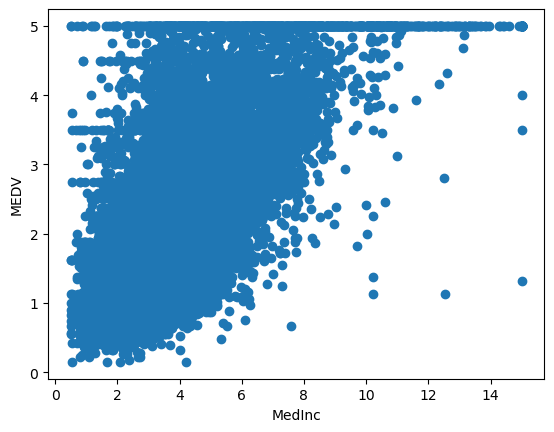

In [26]:
plt.scatter(df['MedInc'], df['MEDV'], marker='o')
plt.xlabel('MedInc')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

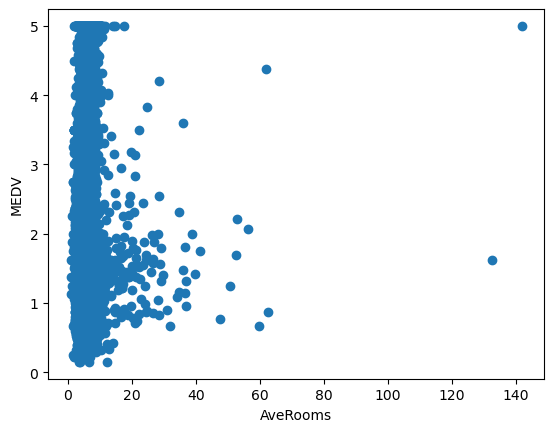

In [27]:
plt.scatter(df['AveRooms'], df['MEDV'], marker='o')
plt.xlabel('AveRooms')
plt.ylabel('MEDV')

## Training the Model

In [28]:
x = pd.DataFrame(np.c_[df['AveRooms'], df['MedInc']], columns=['AveRooms', 'MedInc'])
Y = df['MEDV']

### We will split the dataset into 70 percent for training and 30 percent for testing:

In [30]:
x_train, x_test, Y_train, Y_test = train_test_split(
    x,
    Y,
    test_size=0.3,
    random_state=5)

In [31]:
print(x_train.shape)
print(Y_train.shape)

(14448, 2)
(14448,)


In [32]:
print(x_test.shape)
print(Y_test.shape)

(6192, 2)
(6192,)


In [36]:
model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

In [37]:
price_pred = model.predict(x_test)

In [38]:
print('R-Squared: %.4f' % model.score(x_test,
                                      Y_test))

R-Squared: 0.4924


In [40]:
mse = mean_squared_error(Y_test, price_pred)
print(mse)

0.6919541480004131


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

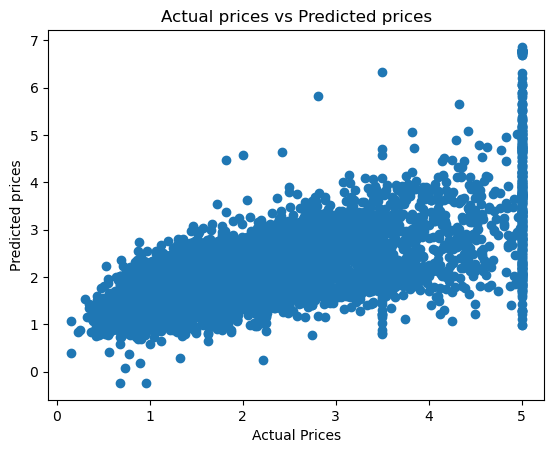

In [41]:
plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

In [42]:
### Getting the Intercept and Coefficients

In [43]:
print(model.intercept_)
print(model.coef_)

0.567856466318921
[-0.03240486  0.43191852]


In [44]:
print(model.predict([[5, 5]]))

[2.56542476]


/Users/ismaildogan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
